In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


/Users/aperrier/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


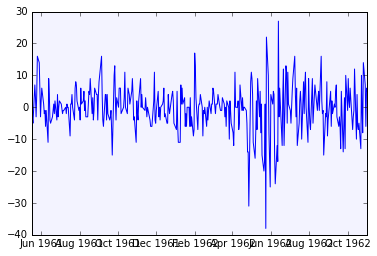

In [9]:
ts = pd.read_csv('../data/ibm-common-stock-closing-prices-.csv', parse_dates = ['Date'], index_col = 'Date', infer_datetime_format = True, skipfooter=2)
ts.columns = ['price']
ts.head()

ts['difference'] = ts.price[1:] - ts.price.shift(1)
ts.dropna(inplace=True)

plt.plot(ts.difference)

In [19]:
from sklearn.metrics import mean_squared_error as mse

# Prediction of the difference
ts['predict_naive'] =ts.difference.shift(1)
ts.dropna(inplace=True)
mse(ts.predict_naive, ts.difference)


96.741379310344826

44.901428571428568

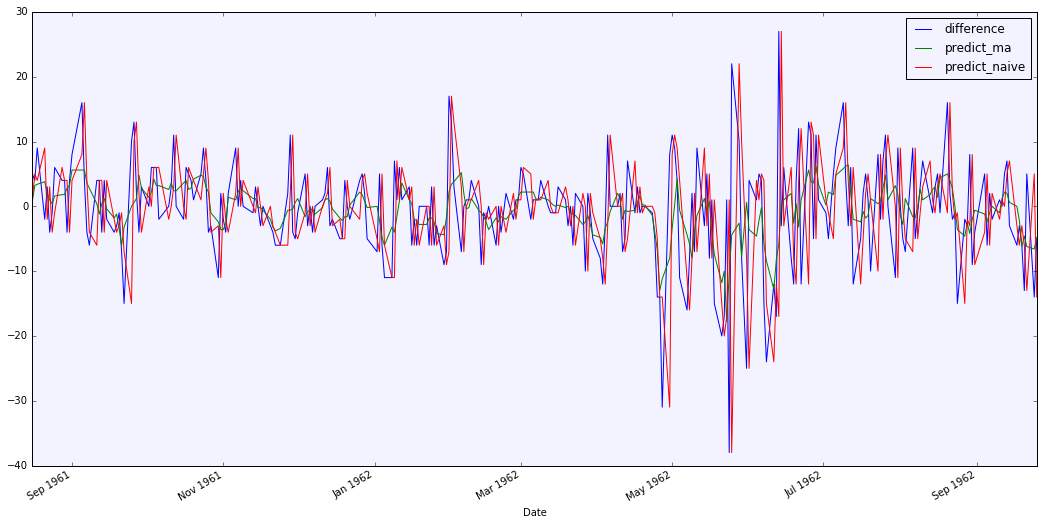

In [33]:
# Predict with Moveing Average
ts['predict_ma'] = ts.difference.rolling(window = 5, center= True).mean().shift(1)
ts.dropna(inplace=True)
ts[['difference', 'predict_ma', 'predict_naive']].plot(figsize=(18,9))
mse(ts.predict_ma, ts.difference)
    


0.24963815512196849

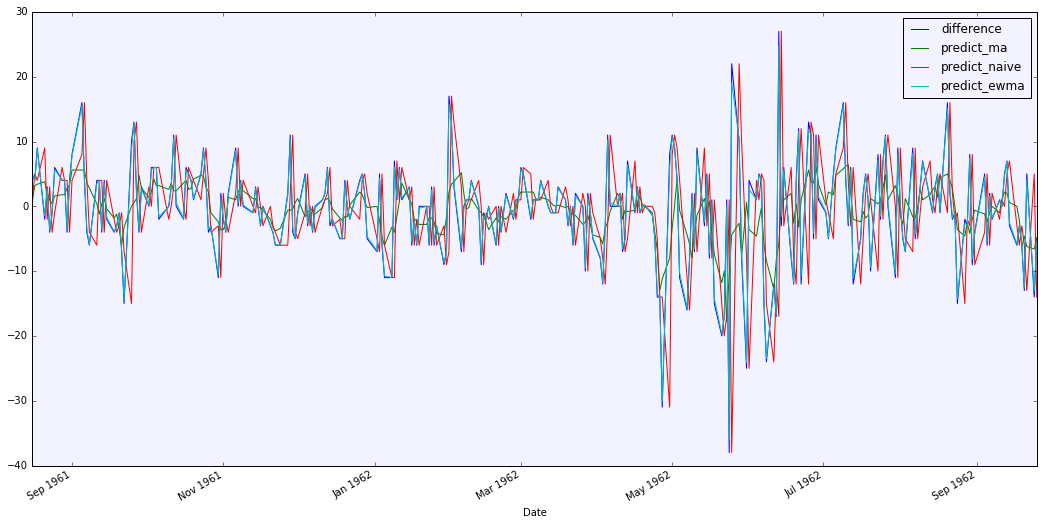

In [38]:
ts['predict_ewma'] = ts.difference.ewm(alpha = 0.95).mean()
ts[['difference', 'predict_ma', 'predict_naive', 'predict_ewma']].plot(figsize=(18,9))
mse(ts.predict_ewma, ts.difference)

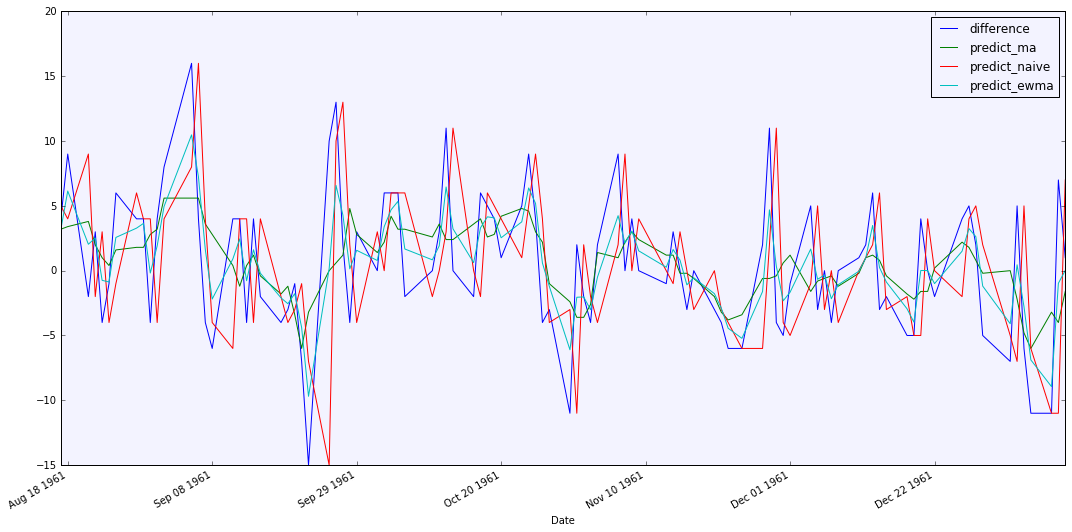

In [37]:
ts[['difference', 'predict_ma', 'predict_naive', 'predict_ewma']][1:100].plot(figsize=(18,9))